# Traffic Accident Data Analysis Script

This script analyzes traffic accident data to identify patterns related to 
road conditions, weather, and time of day. It also visualizes accident hotspots
and contributing factors.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Load the dataset
file_path = r"C:\Users\anees\OneDrive\Desktop\ENTRI DSML\Untitled Folder\Accidents0515.csv"
data = pd.read_csv(file_path)


In [3]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  

In [4]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())




Missing Values in Each Column:
Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                       

# Data Cleaning

In [5]:

# 1. Fill missing numerical values with median
data['Location_Easting_OSGR'].fillna(data['Location_Easting_OSGR'].median(), inplace=True)
data['Location_Northing_OSGR'].fillna(data['Location_Northing_OSGR'].median(), inplace=True)
data['Longitude'].fillna(data['Longitude'].median(), inplace=True)
data['Latitude'].fillna(data['Latitude'].median(), inplace=True)


In [6]:
# 2. Fill missing categorical values with mode or specific values
data['Time'].fillna(data['Time'].mode()[0], inplace=True)
data['Pedestrian_Crossing-Human_Control'].fillna('None', inplace=True)
data['Pedestrian_Crossing-Physical_Facilities'].fillna('None', inplace=True)

In [7]:
# 3. Drop columns with excessive missing data
data.drop(columns=['LSOA_of_Accident_Location'], inplace=True)

In [8]:
# Verify no missing data remains
print("\nRemaining Missing Values After Cleaning:")
print(data.isnull().sum())



Remaining Missing Values After Cleaning:
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control           

In [9]:
# Extract Hour of Day for Time Analysis
data['Time'] = data['Time'].astype(str)
data['Hour'] = data['Time'].str.split(':').str[0].astype(float)

# 1. Accidents by Time of Day

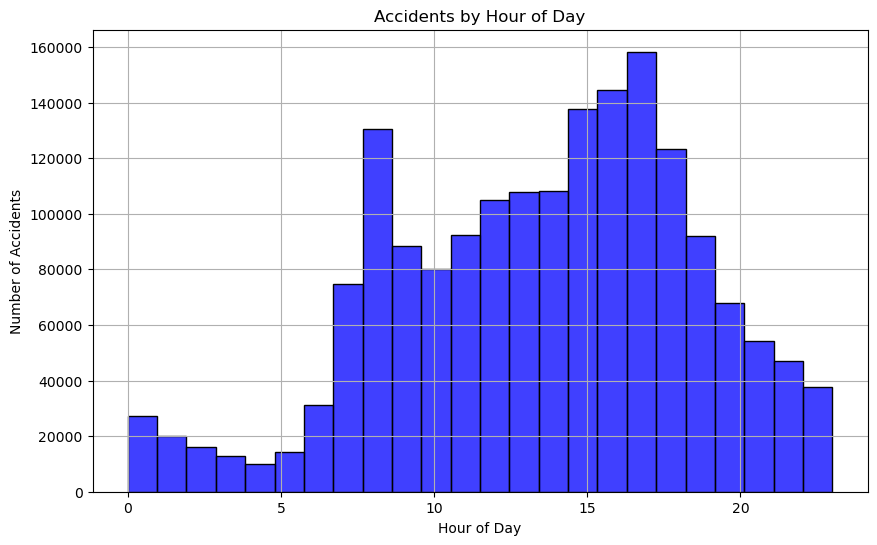

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Hour'], bins=24, kde=False, color='blue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# 2. Accidents by Weather Conditions

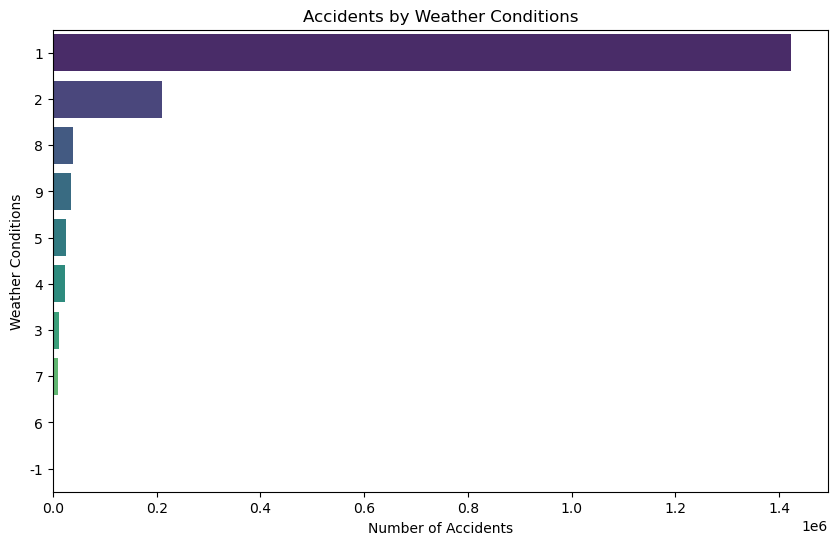

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Conditions', data=data, 
              order=data['Weather_Conditions'].value_counts().index, palette='viridis')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.show()

# 3. Accidents by Road Surface Conditions

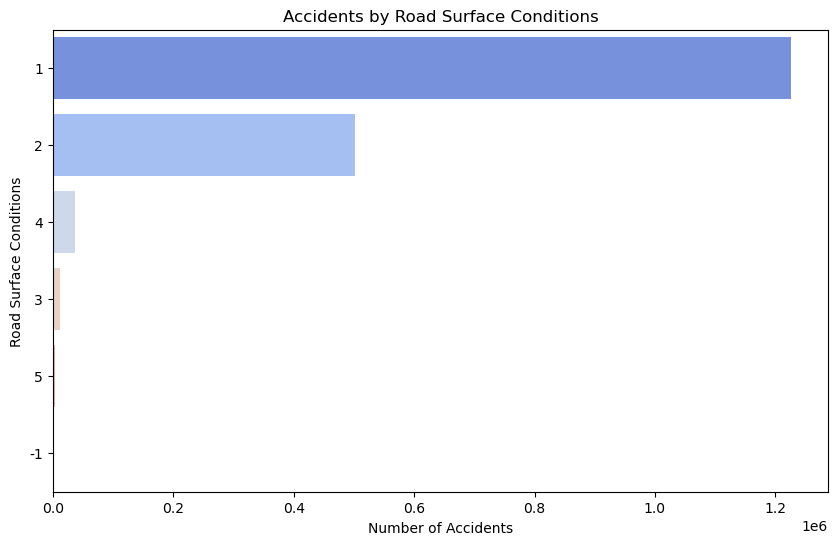

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Road_Surface_Conditions', data=data, 
              order=data['Road_Surface_Conditions'].value_counts().index, palette='coolwarm')
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Conditions')
plt.show()


# 4. Accidents by Road Type

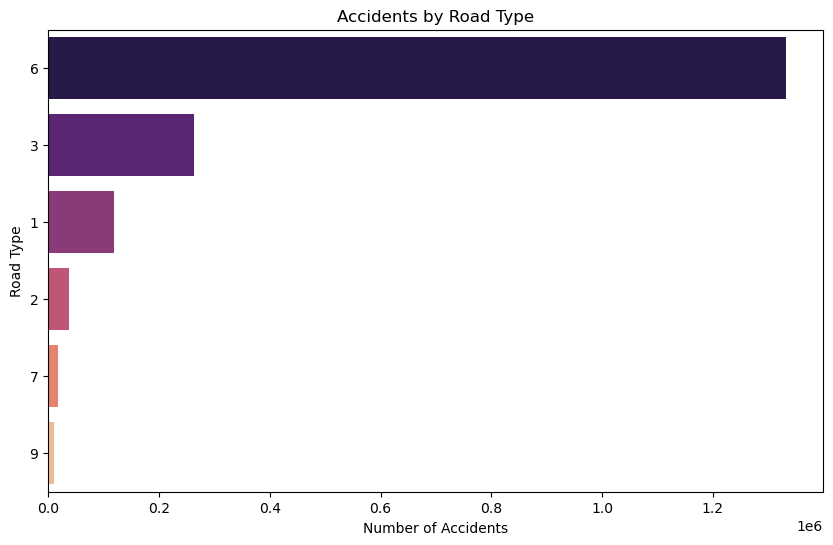

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Road_Type', data=data, 
              order=data['Road_Type'].value_counts().index, palette='magma')
plt.title('Accidents by Road Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Type')
plt.show()

# 5. Accident Severity Distribution

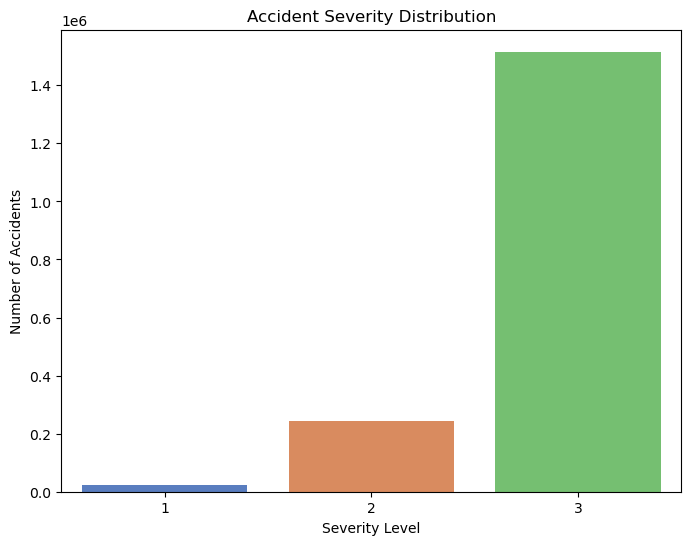

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=data, palette='muted')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()


# 6. Visualize Accident Hotspots (Hexbin Plot)

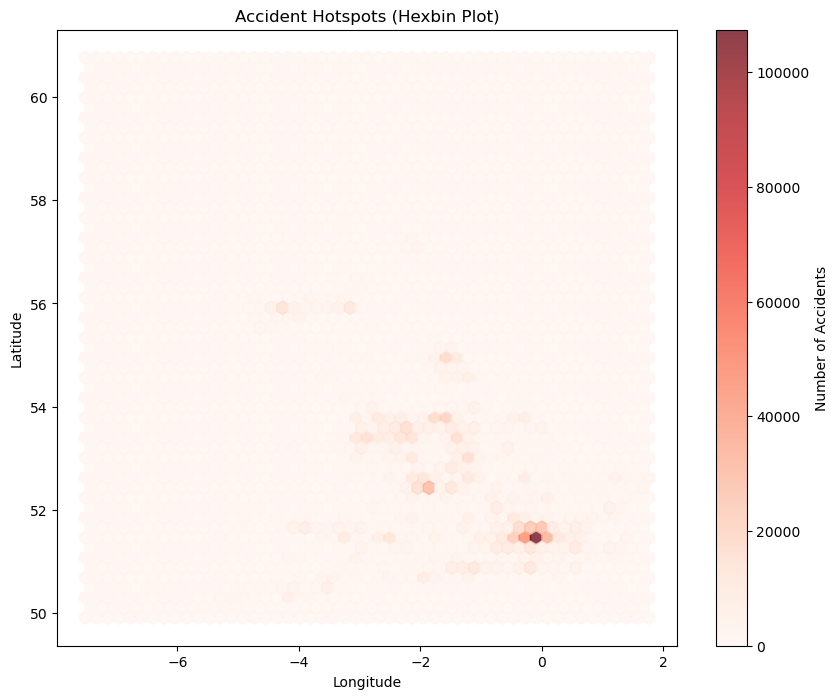

In [15]:
plt.figure(figsize=(10, 8))
plt.hexbin(data['Longitude'], data['Latitude'], gridsize=50, cmap='Reds', alpha=0.75)
plt.colorbar(label='Number of Accidents')
plt.title('Accident Hotspots (Hexbin Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Graph Analysis and Insights


# 1. Accidents by Hour of Day

Graph: Histogram showing the number of accidents for each hour.

Insights:
* Peak accident times are likely during rush hours (e.g., 7-9 AM and 5-7 PM).
* Late-night accidents could indicate issues like poor visibility or fatigue.


# 2. Accidents by Weather Conditions

Graph: Bar chart showing the number of accidents for different weather conditions.

Insights:
* Rainy or foggy weather contributes significantly to accidents due to reduced visibility and slippery roads.
* Clear weather might still have a high count due to more vehicles on the road.


# 3. Accidents by Road Surface Conditions

Graph: Bar chart showing the number of accidents for different road surface conditions.

Insights:
* Wet or icy surfaces lead to more accidents due to reduced traction.
* Dry roads might show higher numbers because they are more commonly encountered.


# 4. Accidents by Road Type

Graph: Bar chart showing the number of accidents for different road types.

Insights:
* Highways or arterial roads likely have more accidents due to higher speeds.
* Urban roads may also show significant numbers due to higher traffic density.


# 5. Accident Severity Distribution

Graph: Bar chart showing the distribution of severity levels.

Insights:
* Most accidents are of low or moderate severity, but severe accidents need targeted interventions.


# 6. Accident Hotspots (Hexbin Plot)

Graph: Hexbin plot showing dense accident areas.

Insights:
* Dense clusters indicate accident hotspots, often near intersections, urban centers, or highways.
* These areas require targeted safety measures like better signage or traffic calming.
 

# Summary of Insights
Time of Day: Accidents peak during rush hours and late at night, indicating a need for traffic management and awareness campaigns.

Weather Conditions: Adverse weather conditions like rain and fog significantly increase accident risk.

Road Surface Conditions: Wet and icy roads contribute to accidents, highlighting the need for road maintenance and cautionary measures.

Road Type: Highways and urban roads are frequent accident sites, suggesting targeted interventions for speed control and traffic flow management.

Severity Levels: Most accidents are of low severity, but high-severity accidents demand specific focus on hotspots.

Hotspots: Geographical clusters of accidents highlight areas for infrastructure improvement and increased enforcement.
